In [12]:
# Mathematical and Data Managment
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from IPython.display import HTML

# Image processing
from PIL import Image
from IPython.display import Image as IPImage


# Miscelaneous
from functools import partial
import io
import os
from concurrent.futures import ProcessPoolExecutor
from tqdm import tqdm

# Settings for plots
plt.rcParams['font.family'] = 'cmr10'
plt.rcParams['mathtext.fontset'] = 'cm'

pallete_sin_npd = ["forestgreen", "red", "darkblue", "purple"]

#sns.set_style('white')

In [38]:
group_segregation_daily = pd.read_pickle('/mnt/disk2/Data/Segregation/group_segregation_daily.pkl')
group_segregation_3day = pd.read_pickle('/mnt/disk2/Data/Segregation/group_segregation_3day.pkl')

global_segregation_daily = pd.read_pickle('/mnt/disk2/Data/Segregation/global_segregation_daily.pkl')
global_segregation_3day = pd.read_pickle('/mnt/disk2/Data/Segregation/global_segregation_3day.pkl')
#individual_segregation = pd.read_pickle('/mnt/disk2/Data/Pickle/Segregation/individual_group_segregation.pkl')

# Desagregated Measures (Group Level)

In [43]:
# Resetting index to make 'Date' a column for Seaborn's use
group_segregation_daily.drop(group_segregation_daily[group_segregation_daily.index.get_level_values(1) == 'NPD'].index, inplace=True)
group_segregation_3day.drop(group_segregation_3day[group_segregation_3day.index.get_level_values(1) == 'NPD'].index, inplace=True)


df_daily = group_segregation_daily.reset_index()
df_3day = group_segregation_3day.reset_index()


## Freeman

### Daily

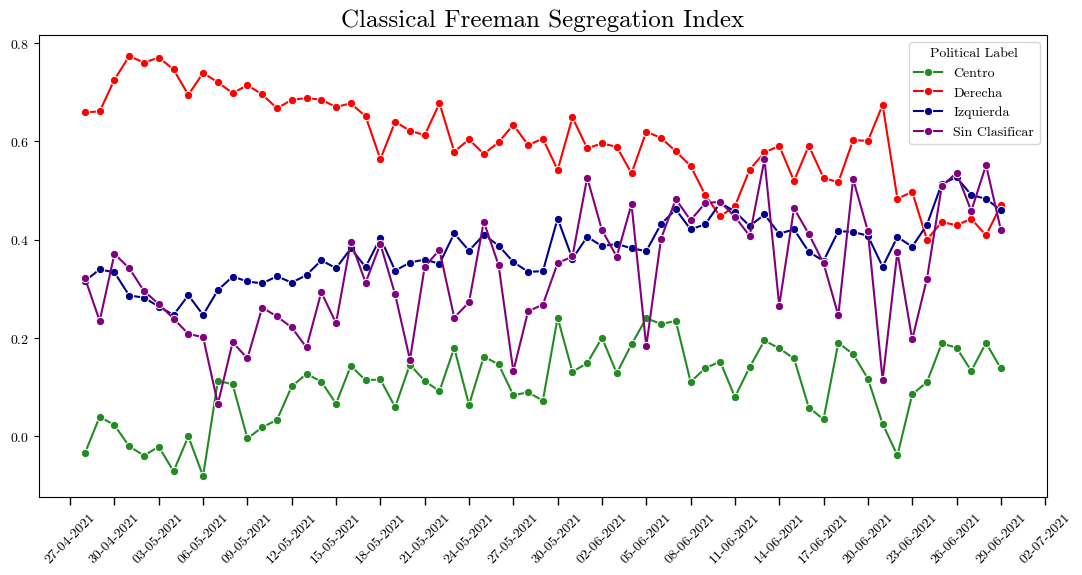

In [44]:
fig, ax = plt.subplots(figsize=(13, 6))
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
# Plot
sns.lineplot(data=df_daily, x='Date', y='Classic Freeman', hue='Political Label',
             palette=pallete_sin_npd, ax=ax, marker='o')

# Axes settings
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis='x', which='both', direction='out', length=6, width=1)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Legend
plt.legend(title='Political Label', bbox_to_anchor=(1, 1), loc='best')

# Title
plt.title('Classical Freeman Segregation Index', fontsize=18)

plt.show()

### 3 Day Rolling Window

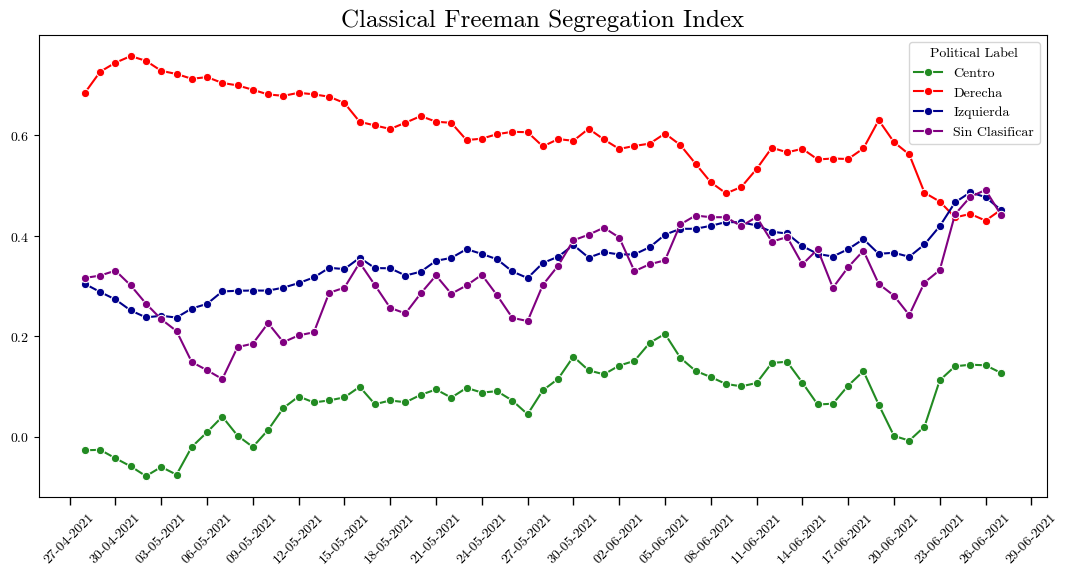

In [45]:
fig, ax = plt.subplots(figsize=(13, 6))
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
# Plot
sns.lineplot(data=df_3day, x='Date', y='Classic Freeman', hue='Political Label',
             palette=pallete_sin_npd, ax=ax, marker='o')

# Axes settings
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis='x', which='both', direction='out', length=6, width=1)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Legend
plt.legend(title='Political Label', bbox_to_anchor=(1, 1), loc='best')

# Title
plt.title('Classical Freeman Segregation Index', fontsize=18)

plt.show()

## Proximity to Others

### Daily

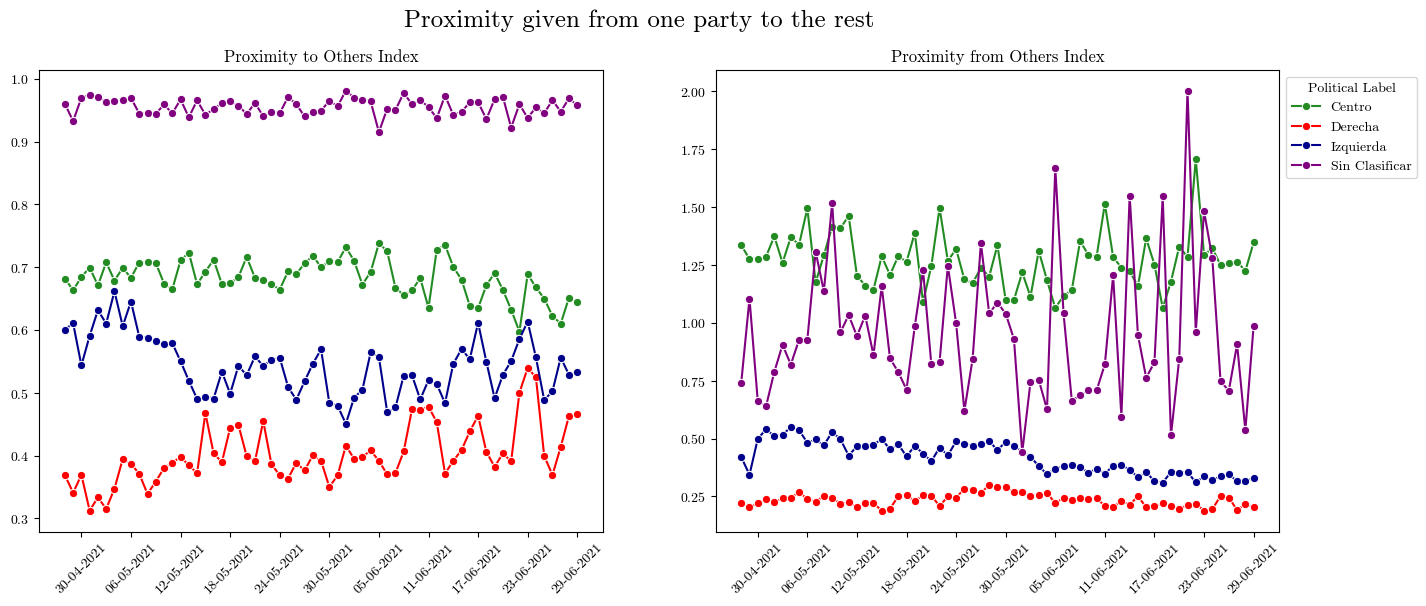

In [46]:
fig, axes = plt.subplots(1,2,figsize=(16, 6))  # Increased size from (12,5) to (16,8)
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
# Plot
sns.lineplot(data=df_daily, x='Date', y='Proximity to Others', hue='Political Label',
             palette=pallete_sin_npd, ax=axes[0], marker='o', legend = False)

sns.lineplot(data=df_daily, x='Date', y="Other's Proximity", hue='Political Label',
             palette=pallete_sin_npd, ax=axes[1], marker='o')

# Axes settings Proximity to Others
for ax in axes:
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax.tick_params(axis = 'x', rotation = 45)
    ax.set_ylabel('')
    ax.set_xlabel('')
    #ax.set_ylim(0,0.5)

axes[0].set_title('Proximity to Others Index')
axes[1].set_title('Proximity from Others Index')

# Legend
plt.legend(title='Political Label', bbox_to_anchor=(1, 1), loc='best')

# Title
plt.suptitle('Proximity given from one party to the rest', fontsize=18)

plt.show()

### 3 Day rolling window

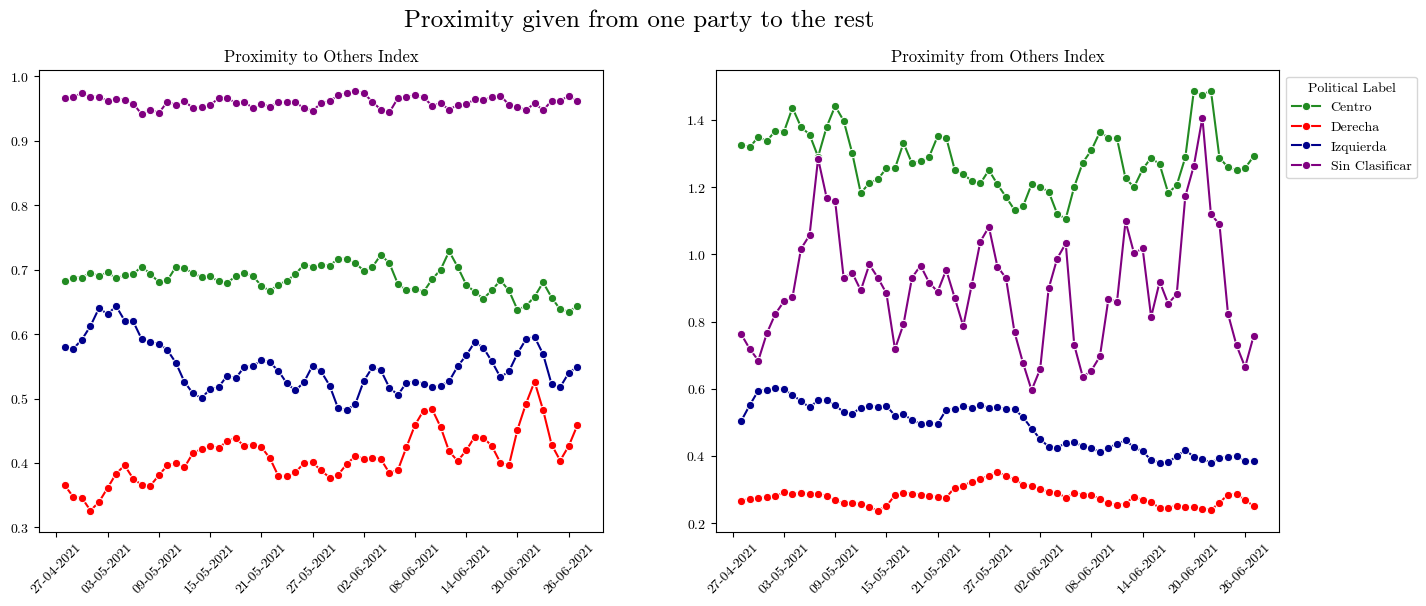

In [47]:
fig, axes = plt.subplots(1,2,figsize=(16, 6))  # Increased size from (12,5) to (16,8)
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
# Plot
sns.lineplot(data=df_3day, x='Date', y='Proximity to Others', hue='Political Label',
             palette=pallete_sin_npd, ax=axes[0], marker='o', legend = False)

sns.lineplot(data=df_3day, x='Date', y="Other's Proximity", hue='Political Label',
             palette=pallete_sin_npd, ax=axes[1], marker='o')

# Axes settings Proximity to Others
for ax in axes:
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax.tick_params(axis = 'x', rotation = 45)
    ax.set_ylabel('')
    ax.set_xlabel('')
    #ax.set_ylim(0,0.5)

axes[0].set_title('Proximity to Others Index')
axes[1].set_title('Proximity from Others Index')

# Legend
plt.legend(title='Political Label', bbox_to_anchor=(1, 1), loc='best')

# Title
plt.suptitle('Proximity given from one party to the rest', fontsize=18)

plt.show()

## Proximity from Specific group to other group

### Daily

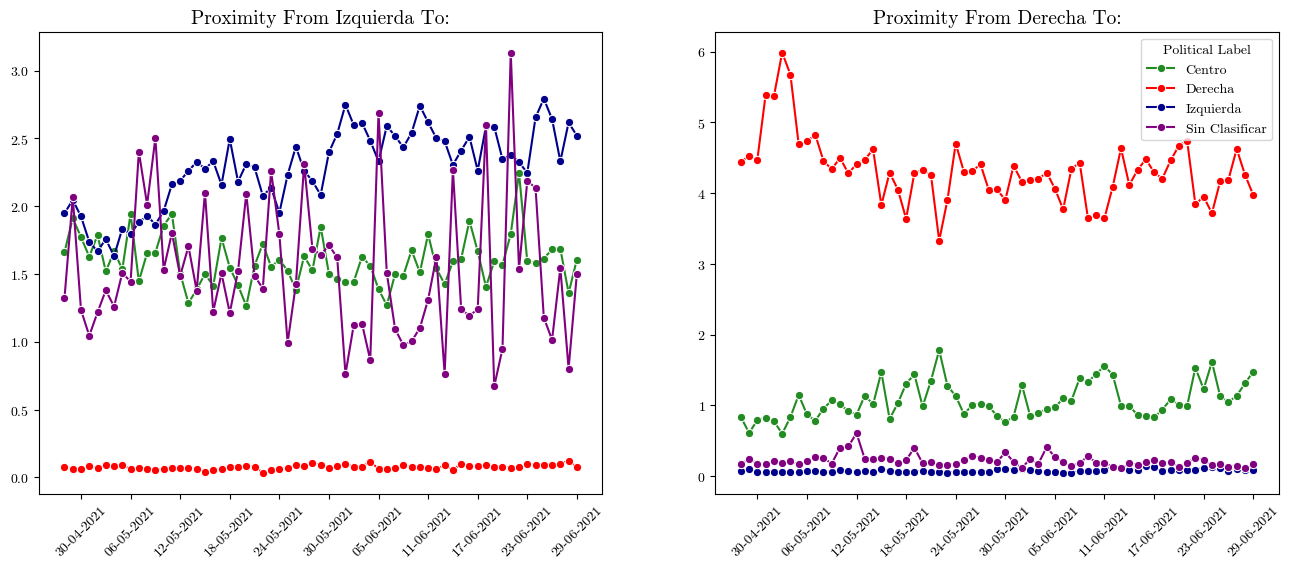

In [48]:
fig, axes = plt.subplots(1,2,figsize=(16, 6))  # Increased size from (12,5) to (16,8)
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
# Plot
sns.lineplot(data=df_daily, x='Date', y='Proximity From Izquierda To', hue='Political Label',
             palette=pallete_sin_npd, ax=axes[0], marker='o', legend = False)

sns.lineplot(data=df_daily, x='Date', y="Proximity From Derecha To", hue='Political Label',
             palette=pallete_sin_npd, ax=axes[1], marker='o')

# Axes settings
for ax in axes:
    # Better readability of X axis
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax.tick_params(axis = 'x', rotation = 45)
    
    # Unnecesarry Titles
    ax.set_ylabel('')
    ax.set_xlabel('')
    
    # Set limits for indexes
    #ax.set_ylim(0,1.5)
    #ax.axhline(y=1, color='gray', linestyle='--', linewidth=1, alpha=0.7)

axes[0].set_title('Proximity From Izquierda To:', fontsize=14)
axes[1].set_title('Proximity From Derecha To:', fontsize=14)

# Legend
#plt.legend(title='Political Label', bbox_to_anchor=(1, 1), loc='best')

plt.show()

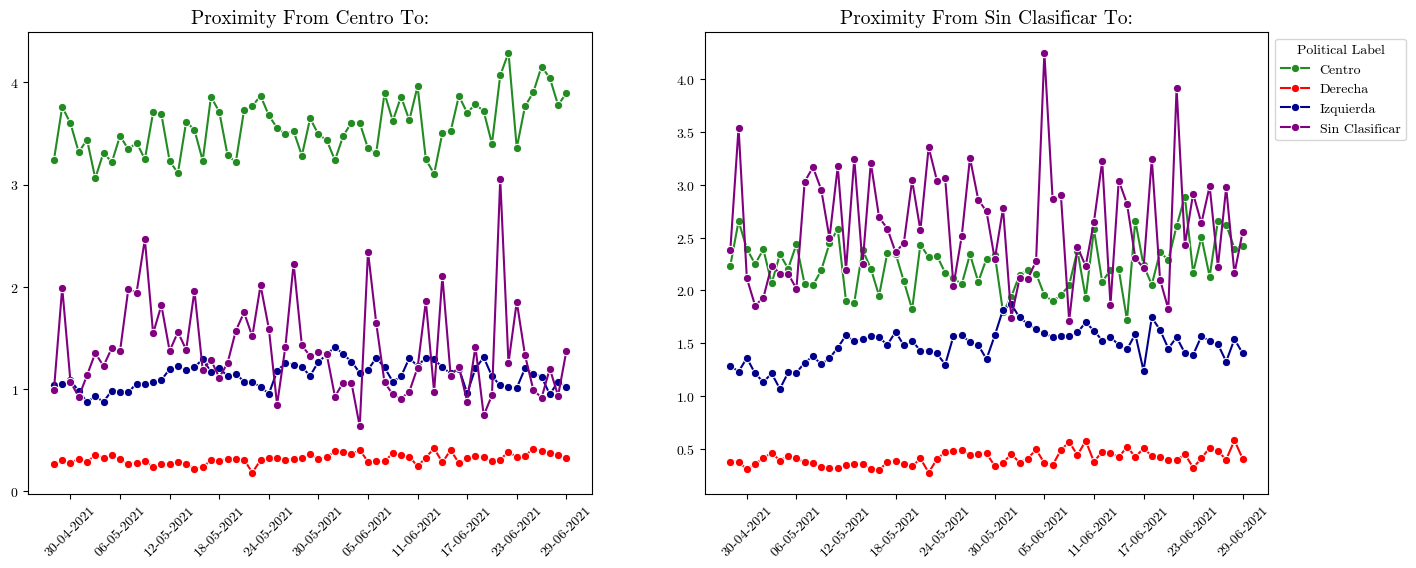

In [22]:
fig, axes = plt.subplots(1,2,figsize=(16, 6))  # Increased size from (12,5) to (16,8)
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
# Plot
sns.lineplot(data=df_daily, x='Date', y='Proximity From Centro To', hue='Political Label',
             palette=pallete_sin_npd, ax=axes[0], marker='o', legend = False)

sns.lineplot(data=df_daily, x='Date', y="Proximity From Sin Clasificar To", hue='Political Label',
             palette=pallete_sin_npd, ax=axes[1], marker='o')

# Axes settings
for ax in axes:
    # Better readability of X axis
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax.tick_params(axis = 'x', rotation = 45)
    
    # Unnecesarry Titles
    ax.set_ylabel('')
    ax.set_xlabel('')
    
    # Set limits for indexes
    #ax.set_ylim(0,0.6)
    #ax.axhline(y=1, color='gray', linestyle='--', linewidth=1, alpha=0.7)

axes[0].set_title('Proximity From Centro To:', fontsize=14)
axes[1].set_title('Proximity From Sin Clasificar To:', fontsize=14)

# Legend
plt.legend(title='Political Label', bbox_to_anchor=(1, 1), loc='best')

plt.show()

### 3 Day Rolling Window

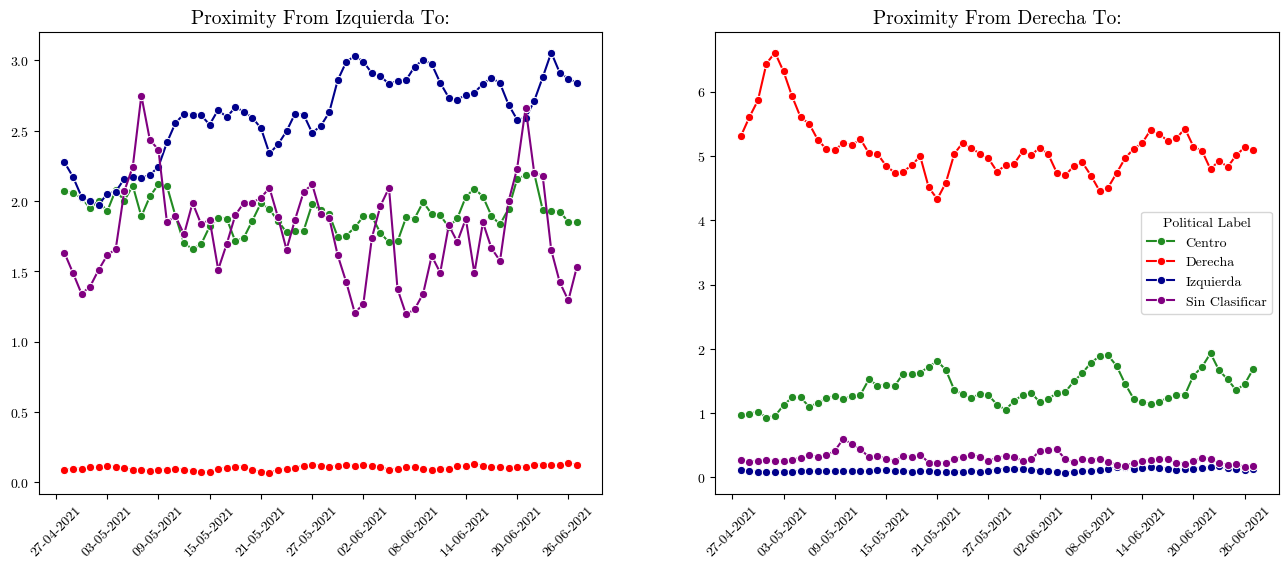

In [49]:
fig, axes = plt.subplots(1,2,figsize=(16, 6))  # Increased size from (12,5) to (16,8)
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
# Plot
sns.lineplot(data=df_3day, x='Date', y='Proximity From Izquierda To', hue='Political Label',
             palette=pallete_sin_npd, ax=axes[0], marker='o', legend = False)

sns.lineplot(data=df_3day, x='Date', y="Proximity From Derecha To", hue='Political Label',
             palette=pallete_sin_npd, ax=axes[1], marker='o')

# Axes settings
for ax in axes:
    # Better readability of X axis
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax.tick_params(axis = 'x', rotation = 45)
    
    # Unnecesarry Titles
    ax.set_ylabel('')
    ax.set_xlabel('')
    
    # Set limits for indexes
    #ax.set_ylim(0,1.5)
    #ax.axhline(y=1, color='gray', linestyle='--', linewidth=1, alpha=0.7)

axes[0].set_title('Proximity From Izquierda To:', fontsize=14)
axes[1].set_title('Proximity From Derecha To:', fontsize=14)

# Legend
#plt.legend(title='Political Label', bbox_to_anchor=(1, 1), loc='best')

plt.show()

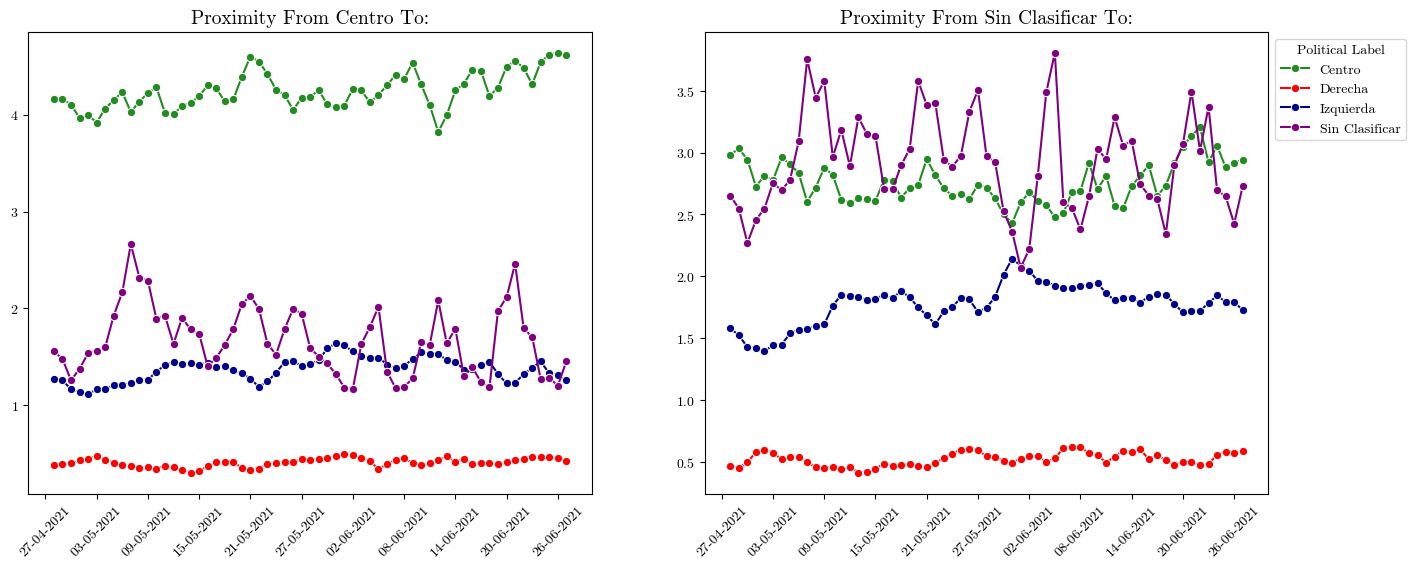

In [50]:
fig, axes = plt.subplots(1,2,figsize=(16, 6))  # Increased size from (12,5) to (16,8)
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
# Plot
sns.lineplot(data=df_3day, x='Date', y='Proximity From Centro To', hue='Political Label',
             palette=pallete_sin_npd, ax=axes[0], marker='o', legend = False)

sns.lineplot(data=df_3day, x='Date', y="Proximity From Sin Clasificar To", hue='Political Label',
             palette=pallete_sin_npd, ax=axes[1], marker='o')

# Axes settings
for ax in axes:
    # Better readability of X axis
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax.tick_params(axis = 'x', rotation = 45)
    
    # Unnecesarry Titles
    ax.set_ylabel('')
    ax.set_xlabel('')
    
    # Set limits for indexes
    #ax.set_ylim(0,0.6)
    #ax.axhline(y=1, color='gray', linestyle='--', linewidth=1, alpha=0.7)

axes[0].set_title('Proximity From Centro To:', fontsize=14)
axes[1].set_title('Proximity From Sin Clasificar To:', fontsize=14)

# Legend
plt.legend(title='Political Label', bbox_to_anchor=(1, 1), loc='best')

plt.show()

## Homophily Index

### Daily

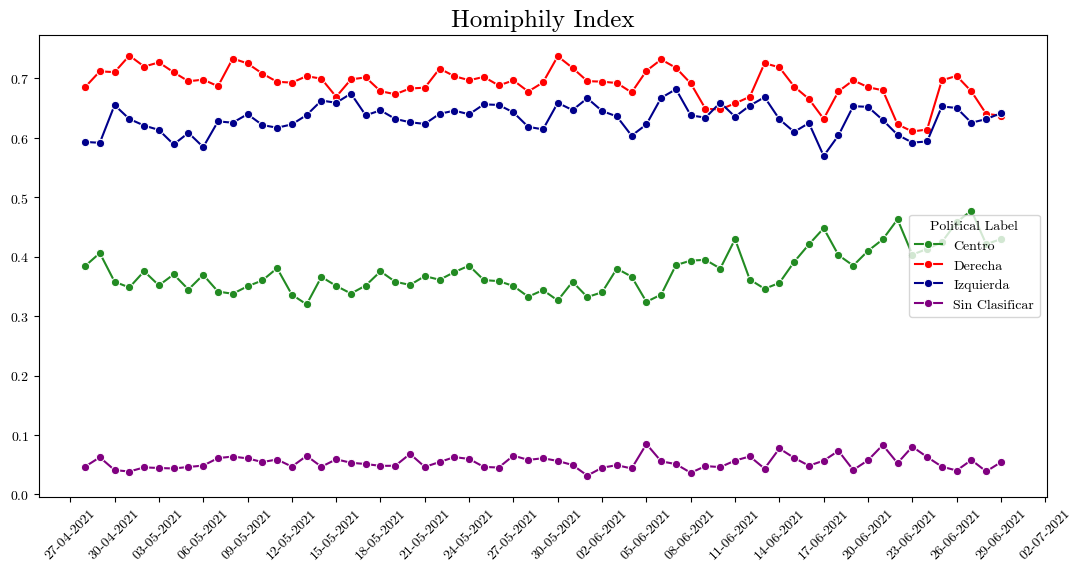

In [51]:
fig, ax = plt.subplots(figsize=(13, 6))  # Increased size from (12,5) to (16,8)
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
# Plot
sns.lineplot(data=df_daily, x='Date', y='Homiphily Index', hue='Political Label',
             palette=pallete_sin_npd, ax=ax, marker='o')

# Axes settings
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_ylabel('')
ax.set_xlabel('')

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Legend
#plt.legend(title='Political Label', bbox_to_anchor=(1, 1), loc='best')

# Title
plt.title('Homiphily Index', fontsize=18)

plt.show()

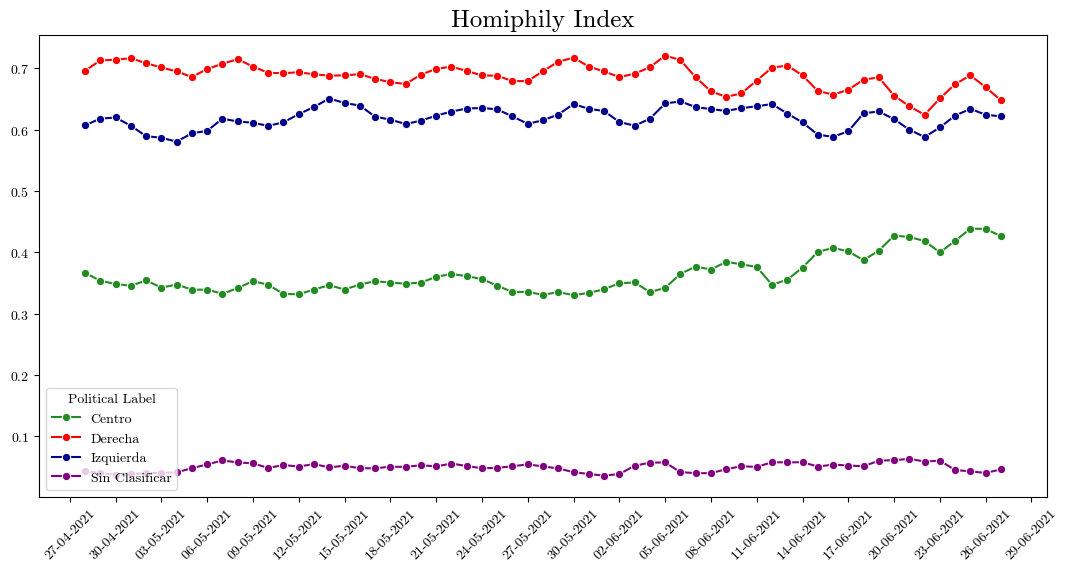

In [52]:
fig, ax = plt.subplots(figsize=(13, 6))  # Increased size from (12,5) to (16,8)
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
# Plot
sns.lineplot(data=df_3day, x='Date', y='Homiphily Index', hue='Political Label',
             palette=pallete_sin_npd, ax=ax, marker='o')

# Axes settings
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_ylabel('')
ax.set_xlabel('')

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Legend
#plt.legend(title='Political Label', bbox_to_anchor=(1, 1), loc='best')

# Title
plt.title('Homiphily Index', fontsize=18)

plt.show()

## Assortativity

### Daily

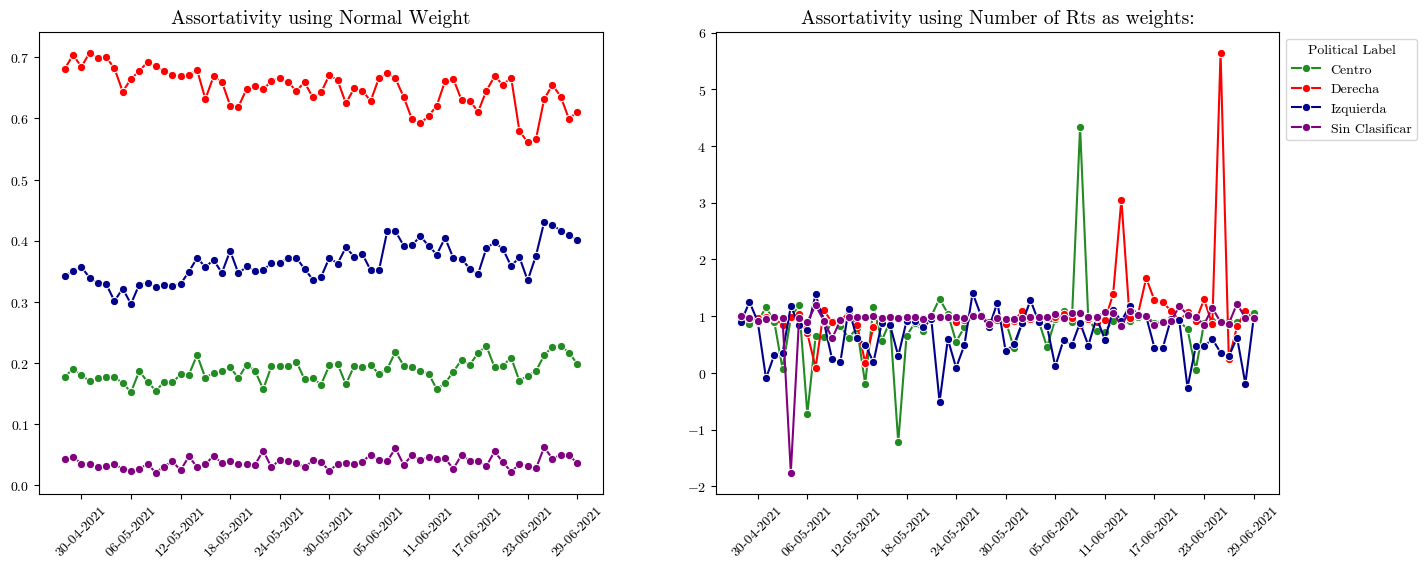

In [53]:
fig, axes = plt.subplots(1,2,figsize=(16, 6))  # Increased size from (12,5) to (16,8)
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
# Plot
sns.lineplot(data=df_daily, x='Date', y='Normal Weighted Assortativity', hue='Political Label',
             palette=pallete_sin_npd, ax=axes[0], marker='o', legend = False)

sns.lineplot(data=df_daily, x='Date', y="Weighted Assortativity", hue='Political Label',
             palette=pallete_sin_npd, ax=axes[1], marker='o')

# Axes settings
for ax in axes:
    # Better readability of X axis
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax.tick_params(axis = 'x', rotation = 45)
    
    # Unnecesarry Titles
    ax.set_ylabel('')
    ax.set_xlabel('')
    
    # Set limits for indexes
    #ax.set_ylim(0,0.6)
    #ax.axhline(y=1, color='gray', linestyle='--', linewidth=1, alpha=0.7)

axes[0].set_title('Assortativity using Normal Weight', fontsize=14)
axes[1].set_title('Assortativity using Number of Rts as weights:', fontsize=14)

# Legend
plt.legend(title='Political Label', bbox_to_anchor=(1, 1), loc='best')

plt.show()

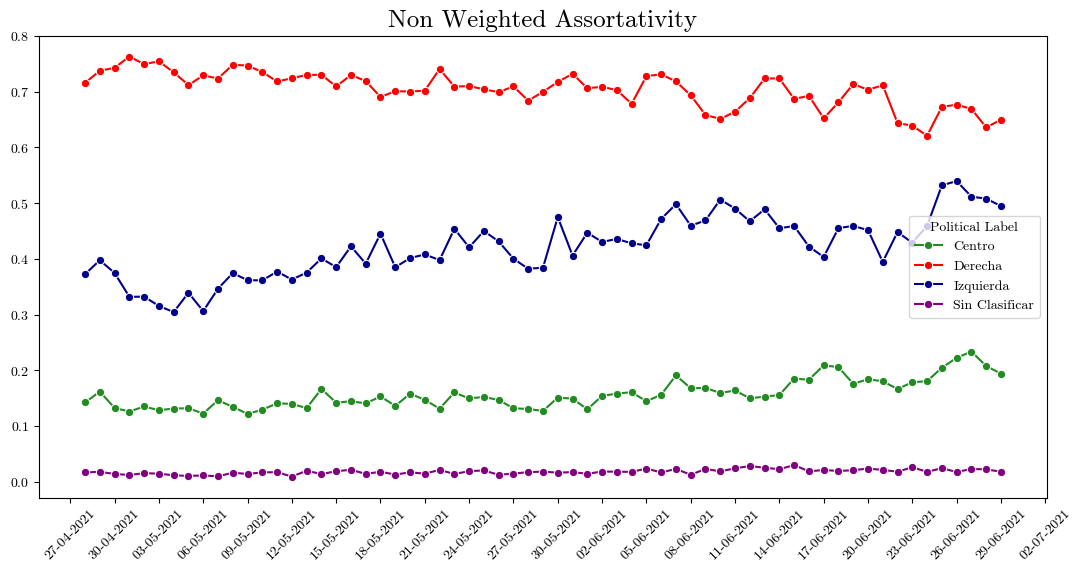

In [54]:
fig, ax = plt.subplots(figsize=(13, 6))  # Increased size from (12,5) to (16,8)
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
# Plot
sns.lineplot(data=df_daily, x='Date', y='Non Weighted Assortativity', hue='Political Label',
             palette=pallete_sin_npd, ax=ax, marker='o')

# Axes settings
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_ylabel('')
ax.set_xlabel('')

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Legend
#plt.legend(title='Political Label', bbox_to_anchor=(1, 1), loc='best')

# Title
plt.title('Non Weighted Assortativity', fontsize=18)

plt.show()

### 3 Day rolling window

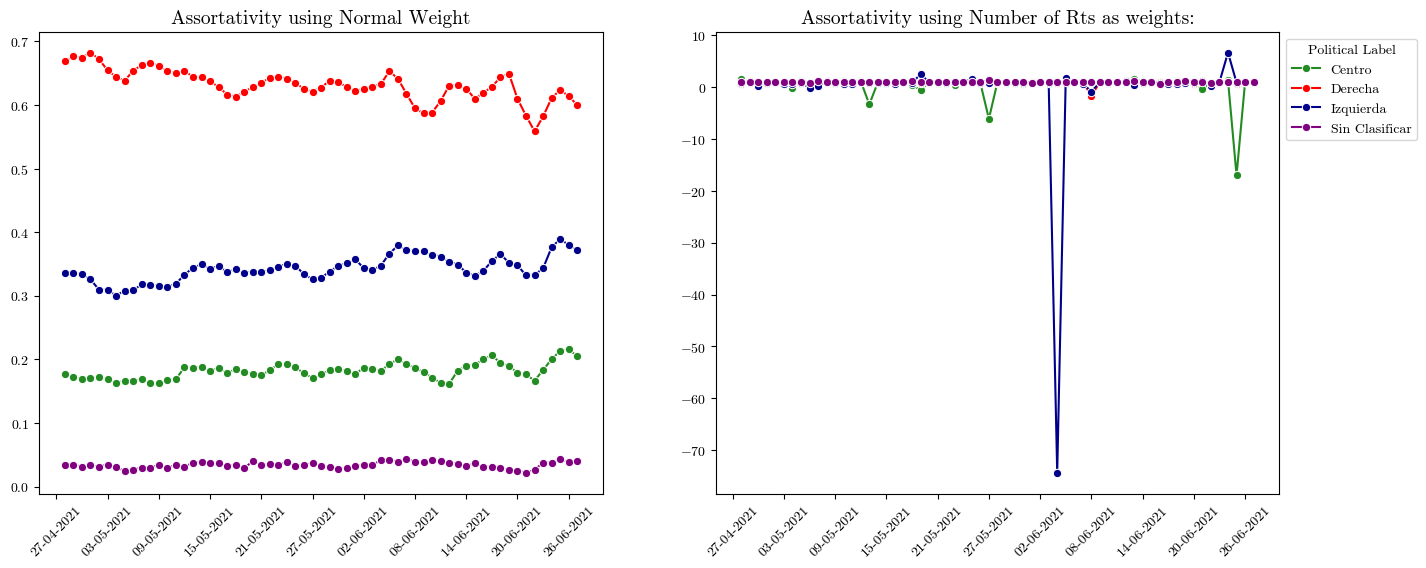

In [55]:
fig, axes = plt.subplots(1,2,figsize=(16, 6))  # Increased size from (12,5) to (16,8)
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
# Plot
sns.lineplot(data=df_3day, x='Date', y='Normal Weighted Assortativity', hue='Political Label',
             palette=pallete_sin_npd, ax=axes[0], marker='o', legend = False)

sns.lineplot(data=df_3day, x='Date', y="Weighted Assortativity", hue='Political Label',
             palette=pallete_sin_npd, ax=axes[1], marker='o')

# Axes settings
for ax in axes:
    # Better readability of X axis
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax.tick_params(axis = 'x', rotation = 45)
    
    # Unnecesarry Titles
    ax.set_ylabel('')
    ax.set_xlabel('')
    
    # Set limits for indexes
    #ax.set_ylim(0,0.6)
    #ax.axhline(y=1, color='gray', linestyle='--', linewidth=1, alpha=0.7)

axes[0].set_title('Assortativity using Normal Weight', fontsize=14)
axes[1].set_title('Assortativity using Number of Rts as weights:', fontsize=14)

# Legend
plt.legend(title='Political Label', bbox_to_anchor=(1, 1), loc='best')

plt.show()

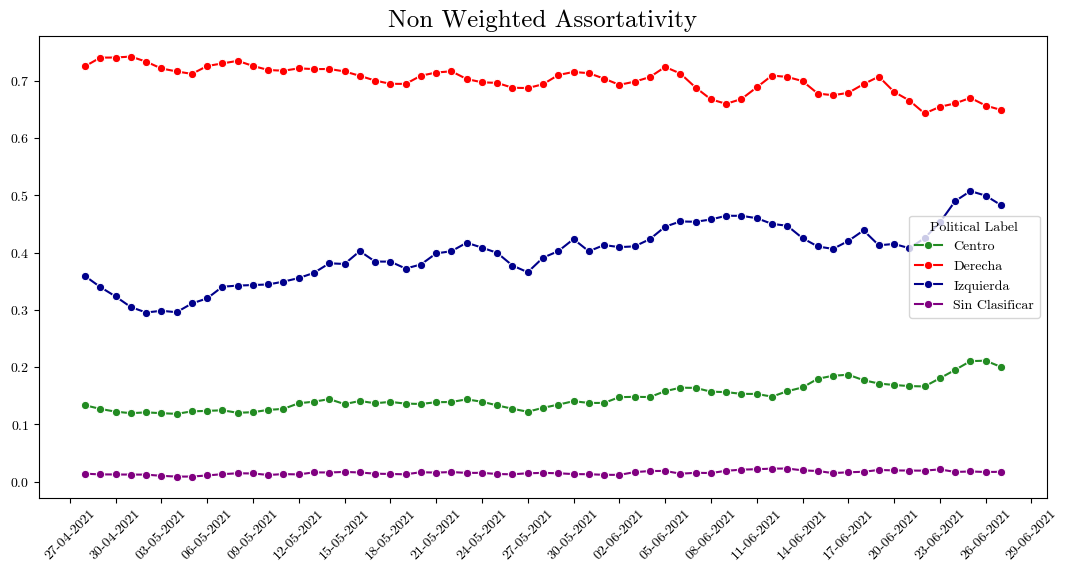

In [56]:
fig, ax = plt.subplots(figsize=(13, 6))  # Increased size from (12,5) to (16,8)
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
# Plot
sns.lineplot(data=df_3day, x='Date', y='Non Weighted Assortativity', hue='Political Label',
             palette=pallete_sin_npd, ax=ax, marker='o')

# Axes settings
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.set_ylabel('')
ax.set_xlabel('')

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Legend
#plt.legend(title='Political Label', bbox_to_anchor=(1, 1), loc='best')

# Title
plt.title('Non Weighted Assortativity', fontsize=18)

plt.show()

# Global Measures

## Daily

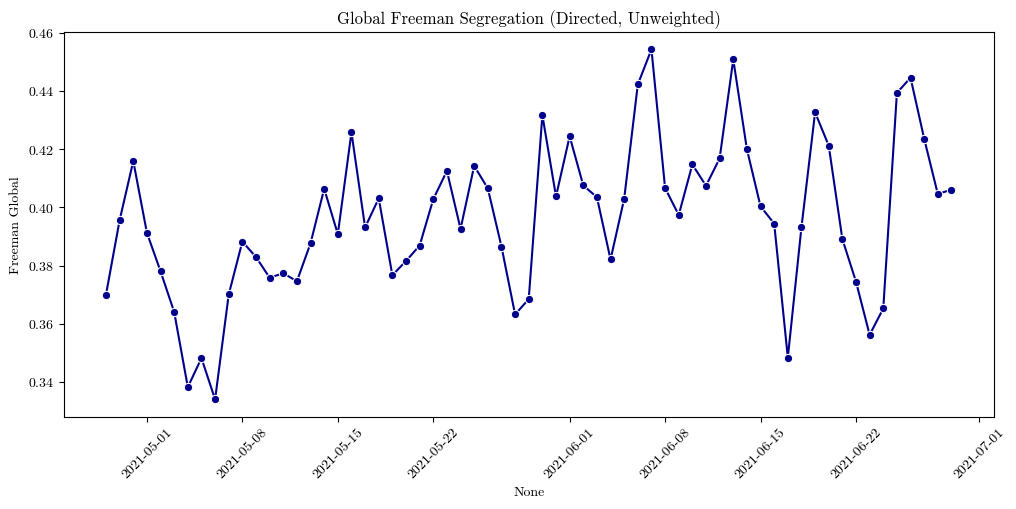

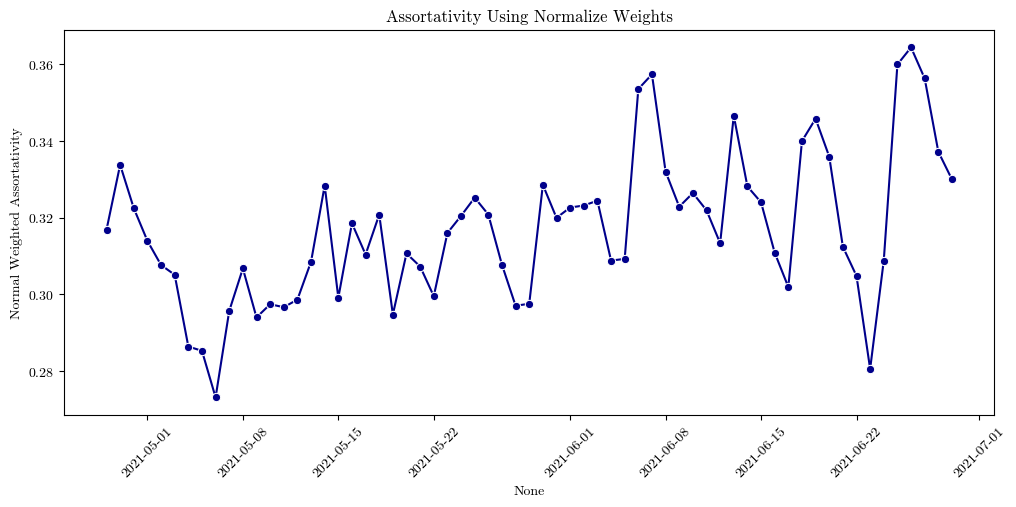

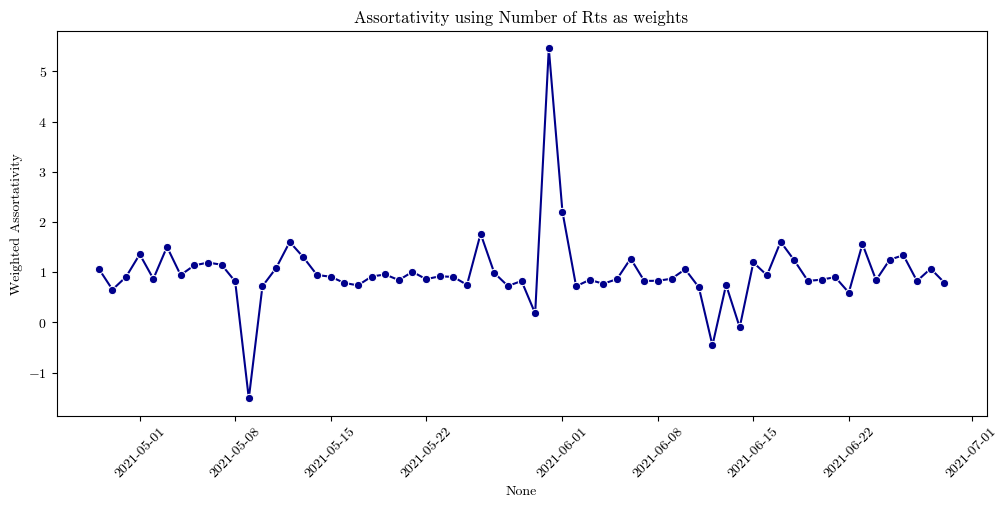

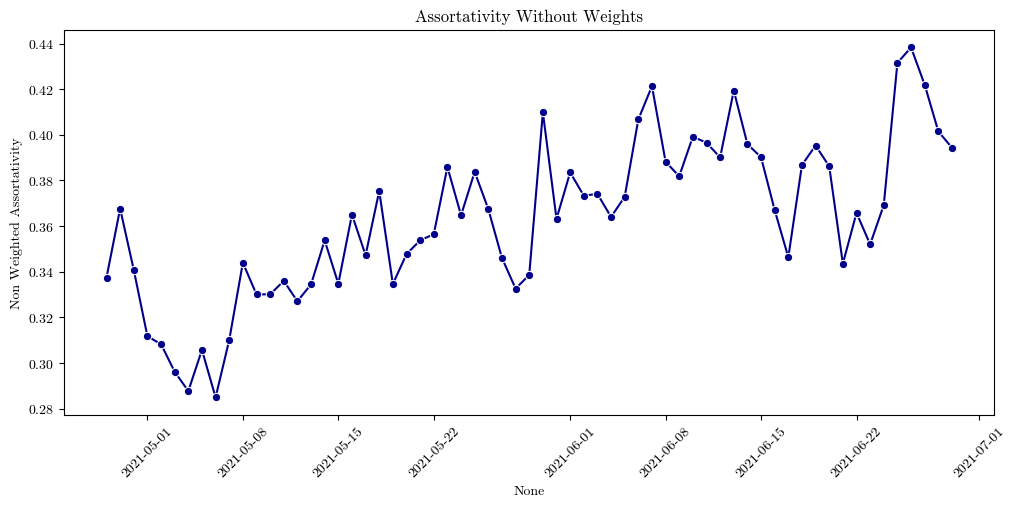

In [58]:
# Plotting using Seaborn with different colors for each category
fig, ax = plt.subplots(figsize = (12,5))
sns.lineplot(global_segregation_daily, x = global_segregation_daily.index, y ='Freeman Global', errorbar=None, ax =ax, marker='o', color = 'darkblue')
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.xticks(rotation=45)
plt.title('Global Freeman Segregation (Directed, Unweighted)')
#plt.savefig("../Results/Global_Freeman_Unweighted.png")
plt.show()

# Plotting using Seaborn with different colors for each category
fig, ax = plt.subplots(figsize = (12,5))
sns.lineplot(global_segregation_daily, x = global_segregation_daily.index, y ='Normal Weighted Assortativity', errorbar=None, ax =ax, marker='o', color = 'darkblue')
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.xticks(rotation=45)
plt.title('Assortativity Using Normalize Weights')
#plt.savefig("../Results/Global_Freeman_Unweighted.png")
plt.show()

# Plotting using Seaborn with different colors for each category
fig, ax = plt.subplots(figsize = (12,5))
sns.lineplot(global_segregation_daily, x = global_segregation_daily.index, y ='Weighted Assortativity', errorbar=None, ax =ax, marker='o', color = 'darkblue')
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.xticks(rotation=45)
plt.title('Assortativity using Number of Rts as weights')
#plt.savefig("../Results/Global_Freeman_Unweighted.png")
plt.show()

# Plotting using Seaborn with different colors for each category
fig, ax = plt.subplots(figsize = (12,5))
sns.lineplot(global_segregation_daily, x = global_segregation_daily.index, y ='Non Weighted Assortativity', errorbar=None, ax =ax, marker='o', color = 'darkblue')
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.xticks(rotation=45)
plt.title('Assortativity Without Weights')
#plt.savefig("../Results/Global_Freeman_Unweighted.png")
plt.show()

### 3 Day Rolling Window

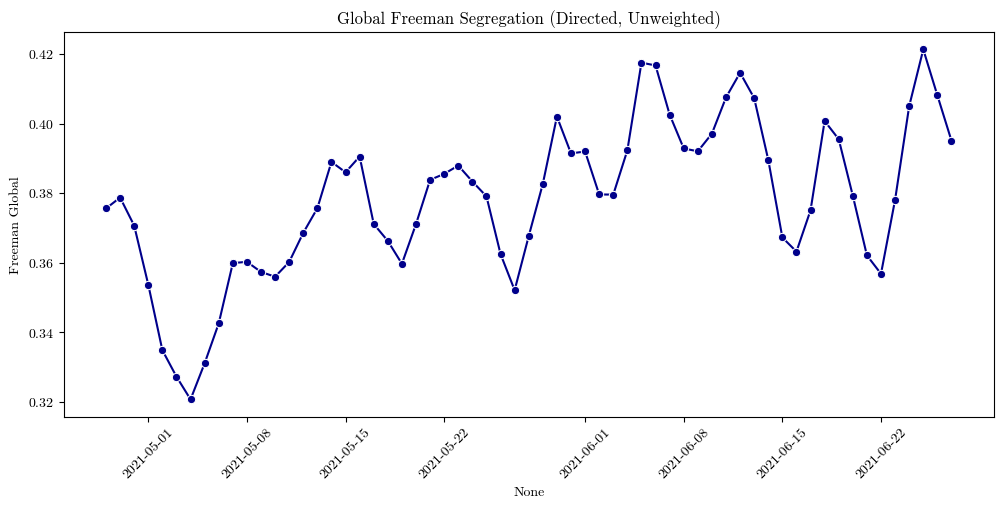

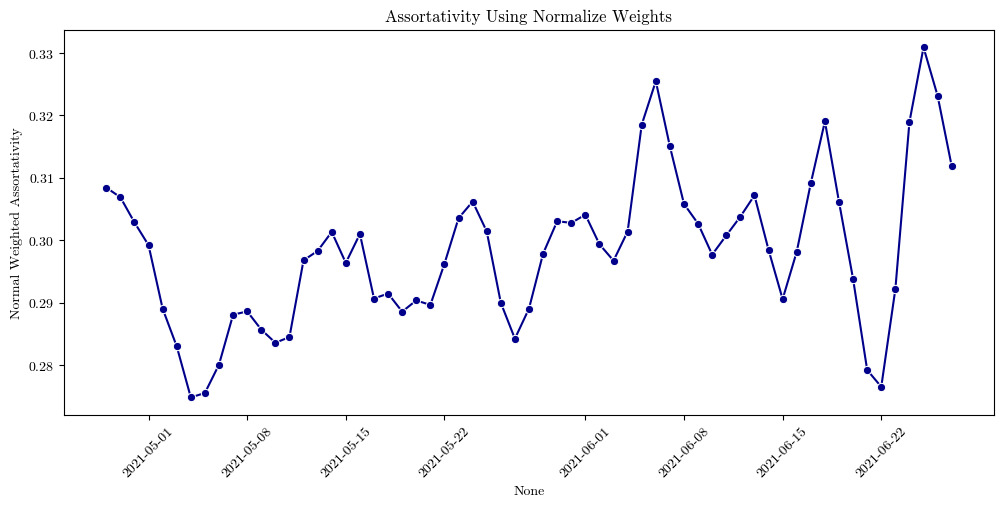

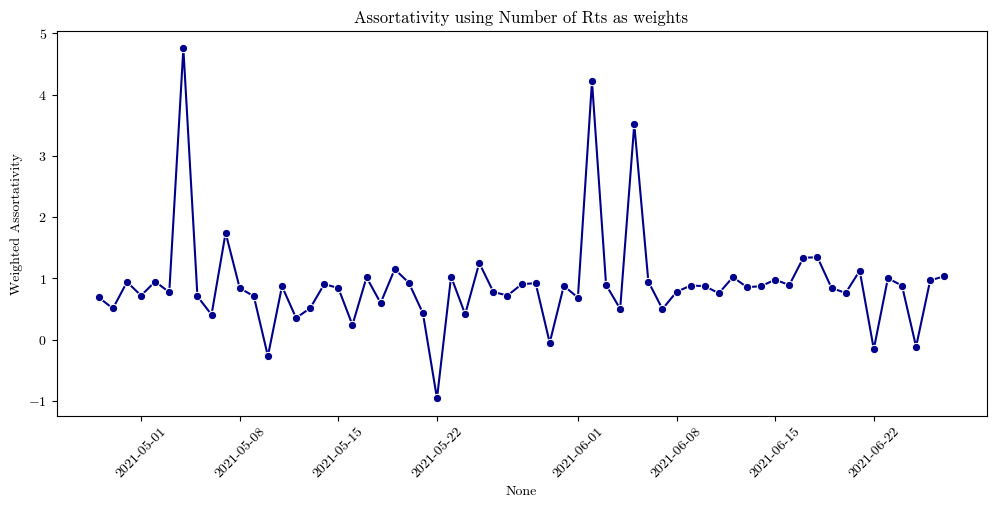

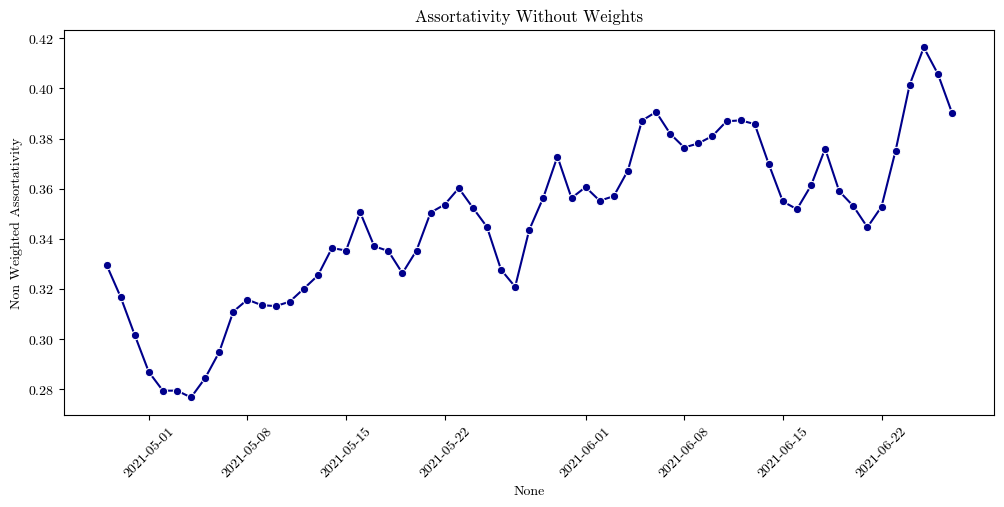

In [59]:
# Plotting using Seaborn with different colors for each category
fig, ax = plt.subplots(figsize = (12,5))
sns.lineplot(global_segregation_3day, x = global_segregation_3day.index, y ='Freeman Global', errorbar=None, ax =ax, marker='o', color = 'darkblue')
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.xticks(rotation=45)
plt.title('Global Freeman Segregation (Directed, Unweighted)')
#plt.savefig("../Results/Global_Freeman_Unweighted.png")
plt.show()

# Plotting using Seaborn with different colors for each category
fig, ax = plt.subplots(figsize = (12,5))
sns.lineplot(global_segregation_3day, x = global_segregation_3day.index, y ='Normal Weighted Assortativity', errorbar=None, ax =ax, marker='o', color = 'darkblue')
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.xticks(rotation=45)
plt.title('Assortativity Using Normalize Weights')
#plt.savefig("../Results/Global_Freeman_Unweighted.png")
plt.show()

# Plotting using Seaborn with different colors for each category
fig, ax = plt.subplots(figsize = (12,5))
sns.lineplot(global_segregation_3day, x = global_segregation_3day.index, y ='Weighted Assortativity', errorbar=None, ax =ax, marker='o', color = 'darkblue')
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.xticks(rotation=45)
plt.title('Assortativity using Number of Rts as weights')
#plt.savefig("../Results/Global_Freeman_Unweighted.png")
plt.show()

# Plotting using Seaborn with different colors for each category
fig, ax = plt.subplots(figsize = (12,5))
sns.lineplot(global_segregation_3day, x = global_segregation_3day.index, y ='Non Weighted Assortativity', errorbar=None, ax =ax, marker='o', color = 'darkblue')
# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.xticks(rotation=45)
plt.title('Assortativity Without Weights')
#plt.savefig("../Results/Global_Freeman_Unweighted.png")
plt.show()

# Study Event-like Plots

In [60]:
def study_event_df(group_segregation: pd.DataFrame, event:str, seg_index:str):
    # Study Event DataFrame (Like the group segregation but empty)
    study_events = group_segregation.copy()[[]].sort_index()
    
    # Get fixed values
    event_seg = group_segregation.loc[event, seg_index]
    event_seg = event_seg.to_dict()
    event_date = datetime.strptime(event, '%Y-%m-%d')
    
    # Get Days (X axis)
    study_events[f"days_from_{event}"] = group_segregation.index.get_level_values('Date') - event_date
    study_events[f"days_from_{event}"] = study_events[f"days_from_{event}"].dt.days
    
    # Get Segregation (Y axis)
    study_events['Segregation Deviation %'] = group_segregation.index.get_level_values('Political Label').map(event_seg)
    study_events['Segregation Deviation %'] = (group_segregation[seg_index] - study_events['Segregation Deviation %']) / study_events['Segregation Deviation %'] 
    
    # Prepare df
    study_events.reset_index(inplace=True)
    study_events.drop(columns='Date', inplace=True)

    return study_events, event

study_event_df(group_segregation_daily,'2021-05-12', 'Classic Freeman')[0]

Political Label  days_from_2021-05-12  Segregation Deviation %
0            Centro                   -14                -1.340681
1           Derecha                   -14                -0.036988
2         Izquierda                   -14                 0.009926
3    Sin Clasificar                   -14                 0.454878
4            Centro                   -13                -0.608440
..              ...                   ...                      ...
247  Sin Clasificar                    47                -0.193790
248          Centro                    48                -0.558193
249         Derecha                    48                 3.634894
250       Izquierda                    48                 1.077718
251  Sin Clasificar                    48                -0.385904

[252 rows x 3 columns]

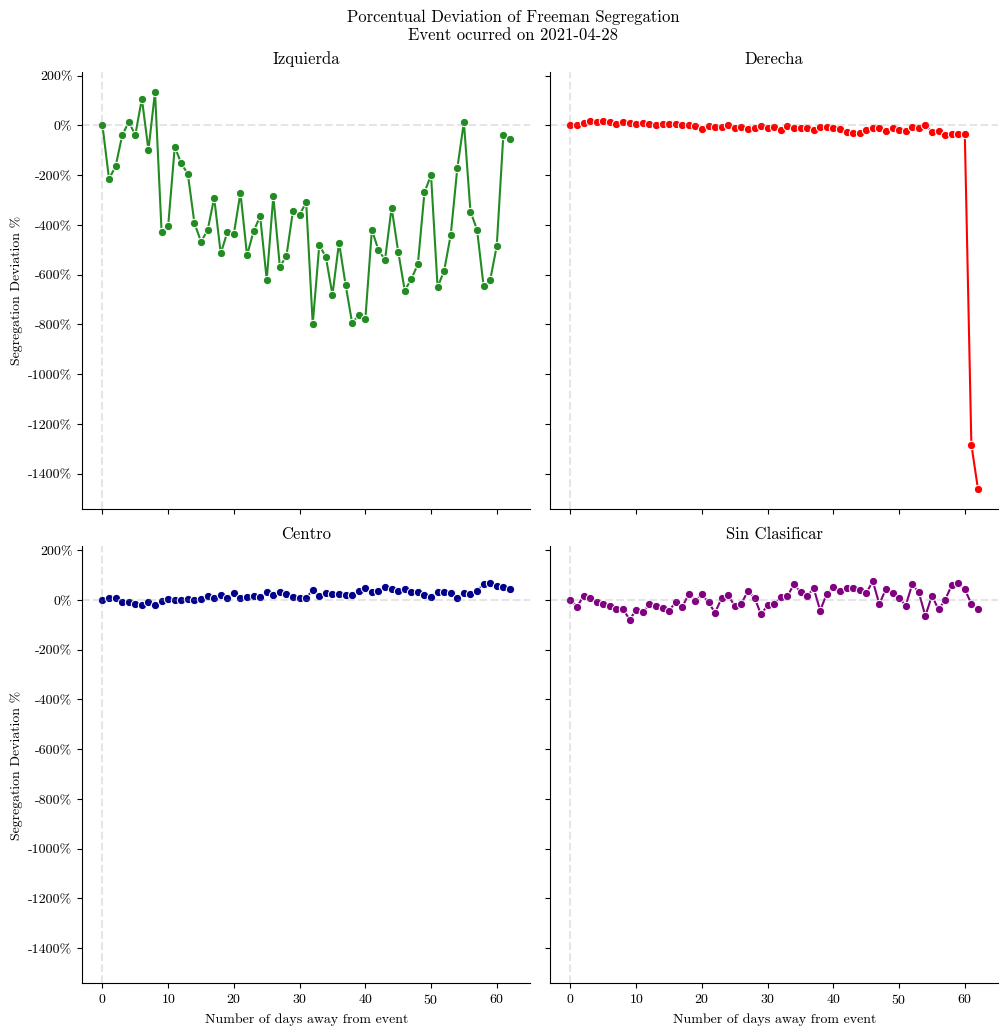

In [61]:
date = '2021-04-28'
categories = ['Izquierda', 'Derecha', 'Centro','Sin Clasificar']
study_events, starting_date = study_event_df(group_segregation_daily, date, 'Classic Freeman')

# Plotting using Seaborn with different colors for each category
plot = sns.relplot(data = study_events, kind = 'line', marker='o',
            x = f'days_from_{starting_date}', y ='Segregation Deviation %',
            col='Political Label', hue='Political Label', col_wrap = 2,
            palette = pallete_sin_npd, legend=False)

# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
percentage_formatter = FuncFormatter(lambda x, pos: f'{x*100:.0f}%')

for ax, pol in zip(plot.axes.flatten(), categories):
    ax.axvline(x=0, color='gray', linestyle='--', alpha=0.2)
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.2)
    ax.set_xlabel('Number of days away from event')
    ax.set_title(pol)
    ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

title_font = {'size': 40, 'weight': 'bold'}
plot.figure.suptitle("Porcentual Deviation of Freeman Segregation", y=1.03, fontdict=title_font)
subtitle_font = {'size': 12, 'weight': 'normal', 'style': 'italic'}
plot.figure.text(0.5, 1, f"Event ocurred on {starting_date}", ha='center', fontdict=subtitle_font)
#plt.savefig(f"../Results/Event_Study_Freeman_{starting_date}.png")
plt.show()

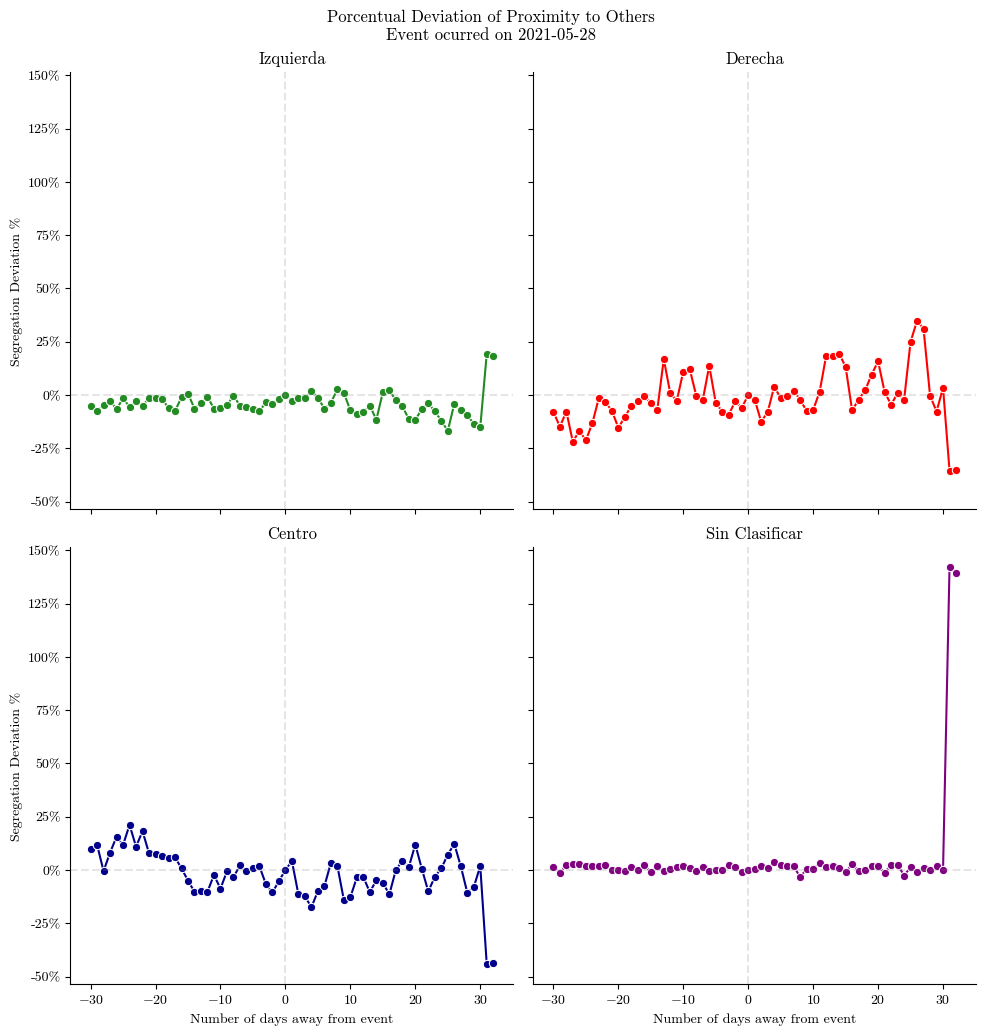

In [62]:
date = '2021-05-28'
categories = ['Izquierda', 'Derecha', 'Centro', 'Sin Clasificar']
study_events, starting_date = study_event_df(group_segregation_daily, date, 'Proximity to Others')

# Plotting using Seaborn with different colors for each category
plot = sns.relplot(data = study_events, kind = 'line', marker='o',
            x = f'days_from_{starting_date}', y ='Segregation Deviation %',
            col='Political Label', hue='Political Label', col_wrap = 2,
            palette = pallete_sin_npd, legend=False)

# Enable the use of Font
plt.rcParams['axes.formatter.use_mathtext'] = True
percentage_formatter = FuncFormatter(lambda x, pos: f'{x*100:.0f}%')

for ax, pol in zip(plot.axes.flatten(), categories):
    ax.axvline(x=0, color='gray', linestyle='--', alpha=0.2)
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.2)
    ax.set_xlabel('Number of days away from event')
    ax.set_title(pol)
    ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

title_font = {'size': 40, 'weight': 'bold'}
plot.figure.suptitle("Porcentual Deviation of Proximity to Others", y=1.03, fontdict=title_font)
subtitle_font = {'size': 12, 'weight': 'normal', 'style': 'italic'}
plot.figure.text(0.5, 1, f"Event ocurred on {starting_date}", ha='center', fontdict=subtitle_font)
#plt.savefig(f"../Results/Event_Study_Freeman_{starting_date}.png")

plt.show()

In [62]:
df = individual_segregation.reset_index()
df_filter = df[df['Political Label'] == 'Izquierda']
# Set up the figure and axis for the animation
fig, ax = plt.subplots()
cols = df_filter.columns[2:-1]
# Initial plot (to set up the view limits)
sns.histplot(df_filter[cols[0]], kde=False, ax=ax, color="darkblue", bins=20, alpha = 0.5)
ax.set_xlim(-0.1,2.5)
ax.set_ylim(0,20000)
ax.clear()  # Clear the axis to remove the initial plot
plt.rcParams['axes.formatter.use_mathtext'] = True
def update(frame):
    ax.clear()  # Clear the current histogram
    sns.histplot(df_filter[cols[frame]], kde=False, ax=ax, color="darkblue", bins=20, alpha = 0.5)
    ax.set_xlim(-0.1,2.5),(0,22500)
    ax.set_ylim(0,22500)
    plt.rcParams['axes.formatter.use_mathtext'] = True
plt.close()
# Create the animation
anim = FuncAnimation(fig, update, frames=range(len(cols)), repeat=False)
anim.save('histogram_izquierda.mp4', fps=1, extra_args=['-vcodec', 'libx264'])
# Display the animation
HTML(anim.to_jshtml())

In [63]:
df = individual_segregation.reset_index()
df_filter = df[df['Political Label'] == 'Derecha']
# Set up the figure and axis for the animation
fig, ax = plt.subplots()
cols = df_filter.columns[2:-1]
# Initial plot (to set up the view limits)
sns.histplot(df_filter[cols[0]], kde=False, ax=ax, color="red", bins=20, alpha = 0.5)
ax.set_xlim(-0.1,7)
ax.set_ylim(0,32000)
ax.clear()  # Clear the axis to remove the initial plot
plt.rcParams['axes.formatter.use_mathtext'] = True
def update(frame):
    ax.clear()  # Clear the current histogram
    sns.histplot(df_filter[cols[frame]], kde=False, ax=ax, color="red", bins=20, alpha = 0.5)
    ax.set_xlim,(-0.1,7),(0,32000)
    ax.set_ylim(0,32000)
    plt.rcParams['axes.formatter.use_mathtext'] = True
plt.close()
# Create the animation
anim = FuncAnimation(fig, update, frames=range(len(cols)), repeat=False)

# Display the animation
HTML(anim.to_jshtml())

In [60]:
df = individual_segregation.reset_index()
df_filter = df[df['Political Label'] == 'Centro']
# Set up the figure and axis for the animation
fig, ax = plt.subplots()
cols = df_filter.columns[2:-1]
# Initial plot (to set up the view limits)
sns.histplot(df_filter[cols[0]], kde=False, ax=ax, color="forestgreen", bins=20, alpha = 0.5)
ax.set_xlim(-0.1,7)
ax.set_ylim(0,25000)
ax.clear()  # Clear the axis to remove the initial plot
plt.rcParams['axes.formatter.use_mathtext'] = True
def update(frame):
    ax.clear()  # Clear the current histogram
    sns.histplot(df_filter[cols[frame]], kde=False, ax=ax, color="forestgreen", bins=20, alpha = 0.5)
    ax.set_xlim,(-0.1,14),(0,30000)
    ax.set_ylim(0,30000)
    plt.rcParams['axes.formatter.use_mathtext'] = True
plt.close()
# Create the animation
anim = FuncAnimation(fig, update, frames=range(len(cols)), repeat=False)

# Display the animation
HTML(anim.to_jshtml())

In [46]:
individual_segregation

Proximity index on 2021-04-28  \
Node  Political Label                                  
0     Centro                                     0.0   
      Derecha                                    0.0   
      Izquierda                                  0.0   
      Sin Clasificar                             0.0   
1     Centro                                     0.0   
...                                              ...   
36962 Sin Clasificar                             0.0   
36963 Centro                                     0.0   
      Derecha                                    0.0   
      Izquierda                                  0.0   
      Sin Clasificar                             0.0   

                       Proximity index on 2021-04-29  \
Node  Political Label                                  
0     Centro                                     0.0   
      Derecha                                    0.0   
      Izquierda                                  0.0   
      Sin Clasificar                             0.0   
1     Centro                                     0.0   
...                                              ...   
36962 Sin Clasificar                             0.0   
36963 Centro                                     0.0   
      Derecha                                    0.0   
      Izquierda                                  0.0   
      Sin Clasificar                             0.0   

                       Proximity index on 2021-04-30  \
Node  Political Label                                  
0     Centro                                     0.0   
      Derecha                                    0.0   
      Izquierda                                  0.0   
      Sin Clasificar                             0.0   
1     Centro                                     0.0   
...                                              ...   
36962 Sin Clasificar                             0.0   
36963 Centro                                     0.0   
      Derecha                                    0.0   
      Izquierda                                  0.0   
      Sin Clasificar                             0.0   

                       Proximity index on 2021-05-01  \
Node  Political Label                                  
0     Centro                                0.000000   
      Derecha                               0.000000   
      Izquierda                             0.000000   
      Sin Clasificar                        0.000000   
1     Centro                                6.350988   
...                                              ...   
36962 Sin Clasificar                        0.000000   
36963 Centro                                0.000000   
      Derecha                               0.000000   
      Izquierda                             0.000000   
      Sin Clasificar                        0.000000   

                       Proximity index on 2021-05-02  \
Node  Political Label                                  
0     Centro                                     0.0   
      Derecha                                    0.0   
      Izquierda                                  0.0   
      Sin Clasificar                             0.0   
1     Centro                                     0.0   
...                                              ...   
36962 Sin Clasificar                             0.0   
36963 Centro                                     0.0   
      Derecha                                    0.0   
      Izquierda                                  0.0   
      Sin Clasificar                             0.0   

                       Proximity index on 2021-05-03  \
Node  Political Label                                  
0     Centro                                     0.0   
      Derecha                                    0.0   
      Izquierda                                  0.0   
      Sin Clasificar                             0.0   
1     Centro                              

In [67]:
df = individual_segregation.reset_index()
df_filter = df[df['Political Label'] == 'Izquierda']
df_filter

Node Political Label  Proximity index on 2021-04-28  \
2           0       Izquierda                       0.000000   
6           1       Izquierda                       0.000000   
10          2       Izquierda                       0.000000   
14          3       Izquierda                       1.607718   
18          4       Izquierda                       1.793601   
...       ...             ...                            ...   
147838  36959       Izquierda                       0.000000   
147842  36960       Izquierda                       0.000000   
147846  36961       Izquierda                       0.000000   
147850  36962       Izquierda                       0.000000   
147854  36963       Izquierda                       0.000000   

        Proximity index on 2021-04-29  Proximity index on 2021-04-30  \
2                            0.000000                       0.000000   
6                            0.982362                       1.528836   
10                           1.964725                       0.611534   
14                           1.473544                       1.362848   
18                           1.695057                       1.599398   
...                               ...                            ...   
147838                       0.000000                       0.000000   
147842                       0.000000                       0.000000   
147846                       0.000000                       0.000000   
147850                       0.000000                       0.000000   
147854                       0.000000                       0.000000   

        Proximity index on 2021-05-01  Proximity index on 2021-05-02  \
2                            0.000000                       0.000000   
6                            1.648563                       1.340837   
10                           0.591792                       0.000000   
14                           1.309703                       1.349488   
18                           1.591138                       1.594453   
...                               ...                            ...   
147838                       0.000000                       1.743089   
147842                       0.000000                       0.000000   
147846                       0.000000                       0.000000   
147850                       0.000000                       1.743089   
147854                       0.000000                       1.162059   

        Proximity index on 2021-05-03  Proximity index on 2021-05-04  \
2                            0.000000                       0.000000   
6                            1.149884                       0.987692   
10                           0.000000                       0.000000   
14                           1.363040                       1.444843   
18                           1.607001                       1.676331   
...                               ...                            ...   
147838                       1.179368                       1.212955   
147842                       0.000000                       0.000000   
147846                       0.000000                       0.000000   
147850                       1.048327                       1.198163   
147854                       0.972979                       0.963229   

        Proximity index on 2021-05-05  ...  Proximity index on 2021-06-18  \
2                            0.000000  ...                       0.000000   
6                            1.080565  ...                       1.326174   
10                           0.000000  ...                       0.000000   
14                           1.488446  ...                       2.320805   
18                           1.716091  ...                       0.000000   
...                               ...  ...                            ...   
147838                       1.284150  ...                       2.320805   
147842                       

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

def save_to_pil(frame):
    df = individual_segregation.reset_index()
    df_filter = df[df['Political Label'] == 'Centro']
    cols = df_filter.columns[2:]
    fig, ax = plt.subplots()
    column = cols[frame]
    sns.histplot(df_filter[cols[frame]], kde=False, ax=ax, color="forestgreen", bins=20, alpha = 0.5)
    ax.set_xlim(-0.1,14)
    ax.set_ylim(0,30000)
    plt.close()
    
    # Save the matplotlib figure to a PIL Image object
    buf = io.BytesIO()
    fig.savefig(buf, format='jpg')
    buf.seek(0)
    hist = Image.open(buf)
    
    return column, hist

def main():
    with ProcessPoolExecutor() as executor:
        images = list(tqdm(executor.map(save_to_pil, range(63)), total=63))
    return images

if __name__=='__main__':
    images = main()
    hist_list = [x[1] for x in sorted(images, key=lambda x: x[0])]
    hist_list[0].save('XD.gif',
                        save_all=True, append_images=hist_list[1:], optimize=False, duration=250, loop=0)

100%|██████████| 63/63 [00:01<00:00, 34.89it/s]


In [25]:
individual_segregation

Proximity index on 2021-04-28  \
Node  Political Label                                  
0     Centro                                     NaN   
      Derecha                                    NaN   
      Izquierda                                  NaN   
      Sin Clasificar                             NaN   
1     Centro                                     NaN   
...                                              ...   
36962 Sin Clasificar                             NaN   
36963 Centro                                     NaN   
      Derecha                                    NaN   
      Izquierda                                  NaN   
      Sin Clasificar                             NaN   

                       Proximity index on 2021-04-29  \
Node  Political Label                                  
0     Centro                                     NaN   
      Derecha                                    NaN   
      Izquierda                                  NaN   
      Sin Clasificar                             NaN   
1     Centro                                     NaN   
...                                              ...   
36962 Sin Clasificar                             NaN   
36963 Centro                                     NaN   
      Derecha                                    NaN   
      Izquierda                                  NaN   
      Sin Clasificar                             NaN   

                       Proximity index on 2021-04-30  \
Node  Political Label                                  
0     Centro                                     NaN   
      Derecha                                    NaN   
      Izquierda                                  NaN   
      Sin Clasificar                             NaN   
1     Centro                                     NaN   
...                                              ...   
36962 Sin Clasificar                             NaN   
36963 Centro                                     NaN   
      Derecha                                    NaN   
      Izquierda                                  NaN   
      Sin Clasificar                             NaN   

                       Proximity index on 2021-05-01  \
Node  Political Label                                  
0     Centro                                     NaN   
      Derecha                                    NaN   
      Izquierda                                  NaN   
      Sin Clasificar                             NaN   
1     Centro                                6.350988   
...                                              ...   
36962 Sin Clasificar                             NaN   
36963 Centro                                     NaN   
      Derecha                                    NaN   
      Izquierda                                  NaN   
      Sin Clasificar                             NaN   

                       Proximity index on 2021-05-02  \
Node  Political Label                                  
0     Centro                                     NaN   
      Derecha                                    NaN   
      Izquierda                                  NaN   
      Sin Clasificar                             NaN   
1     Centro                                     0.0   
...                                              ...   
36962 Sin Clasificar                             NaN   
36963 Centro                                     NaN   
      Derecha                                    NaN   
      Izquierda                                  NaN   
      Sin Clasificar                             NaN   

                       Proximity index on 2021-05-03  \
Node  Political Label                                  
0     Centro                                     NaN   
      Derecha                                    NaN   
      Izquierda                                  NaN   
      Sin Clasificar                             NaN   
1     Centro                              

In [48]:
def plot_hist(col, df):
    result = [col]
    for cat in [('Izquierda','darkblue',(-0.1,2.5),(0,22500)), ('Derecha','red',(-0.1,7),(0,32000)), ('Centro','forestgreen',(-0.1,14),(0,30000))]:
        df_filter = df[df['Political Label'] == cat[0]]
        fig, ax = plt.subplots()
        sns.histplot(df_filter[col], kde=False, ax=ax, color=cat[1], bins=20, alpha = 0.5)
        ax.set_xlim(*cat[2])
        ax.set_ylim(*(0,25000))
        plt.close(fig)
        
        # Save the matplotlib figure to a PIL Image object
        buf = io.BytesIO()
        fig.savefig(buf, format='jpg')
        buf.seek(0)
        hist = Image.open(buf)
        
        result.append(hist)
    
    return result

def main(individual_segregation):
    
    df = individual_segregation.reset_index()
    cols = list(df.columns[2:])
    save_to_pil = partial(plot_hist, df=df)
    with ProcessPoolExecutor() as executor:
        images = list(tqdm(executor.map(save_to_pil, cols), total=len(cols)))
    return images

if __name__ == '__main__':
    
    images_full = main(individual_segregation)
    images_sorted = [x[1:4] for x in sorted(images_full, key=lambda x: x[0])]
    
    # Unpack images
    izquierda_hist = [img[0] for img in images_sorted]
    derecha_hist = [img[1] for img in images_sorted]
    centro_hist = [img[2] for img in images_sorted]
    
    output_path = '../Results/Presentacion Trees'  # Specify the output path for the GIF
    izquierda_hist[0].save(os.path.join(output_path,'histogram_izquierda.gif'), save_all=True, append_images=izquierda_hist[1:], optimize=False, duration=250, loop=0)
    centro_hist[0].save(os.path.join(output_path,'histogram_centro.gif'), save_all=True, append_images=centro_hist[1:], optimize=False, duration=250, loop=0)
    derecha_hist[0].save(os.path.join(output_path,'histogram_derecha.gif'), save_all=True, append_images=derecha_hist[1:], optimize=False, duration=250, loop=0)

100%|██████████| 63/63 [00:13<00:00,  4.81it/s]


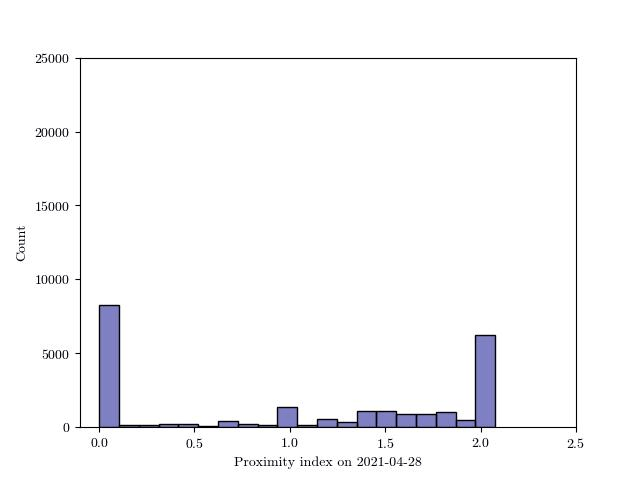

In [45]:
IPImage('../Results/izquierda_hist.gif')